In [35]:
import pandas as pd
import numpy as np

In [36]:
ga = pd.read_excel('Google Analytics -  Dataset.xlsx',usecols=[0,2,3,4,5,6,7,8,9,10])
ga.head(5)

,Country,Impressions,Clicks,CTR,Average Position,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue
0,United Arab Emirates,0,0,0.0,1.0,1,0.0,2.0,0,0.0
1,United Arab Emirates,0,0,0.0,1.0,1,0.0,2.0,0,0.0
2,United Arab Emirates,0,0,0.0,1.0,1,0.0,2.0,0,0.0
3,United Arab Emirates,0,0,0.0,1.0,1,0.0,2.0,0,0.0
4,United Arab Emirates,0,0,0.0,1.0,1,0.0,2.0,0,0.0


In [37]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           5000 non-null   object 
 1   Impressions       5000 non-null   int64  
 2   Clicks            5000 non-null   int64  
 3   CTR               5000 non-null   float64
 4   Average Position  5000 non-null   float64
 5   Sessions          5000 non-null   int64  
 6   Bounce Rate       5000 non-null   float64
 7   Pages / Session   5000 non-null   float64
 8   Transactions      5000 non-null   int64  
 9   Revenue           5000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 390.8+ KB


In [38]:
ga.isnull().sum()

Country             0
Impressions         0
Clicks              0
CTR                 0
Average Position    0
Sessions            0
Bounce Rate         0
Pages / Session     0
Transactions        0
Revenue             0
dtype: int64

In [39]:
ga.describe()

,Impressions,Clicks,CTR,Average Position,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.556200,0.086600,2.266849,21.227736,140.542000,0.014049,6.053111,2.298400,472.185374
std,6.188772,0.361008,12.177758,27.348165,433.208061,0.092514,6.834485,10.028533,2132.993305
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,7.000000,2.000000,0.000000,4.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,36.000000,9.000000,0.000000,8.857143,0.000000,0.000000
max,90.000000,5.000000,100.000000,170.000000,4867.000000,1.000000,96.000000,179.000000,40901.860000


In [42]:
# Filter data by region
Country_df = ga[(ga.Country=="United States") | (ga.Country=="Canada") | (ga.Country=="France") | (ga.Country=="Taiwan") | (ga.Country=="Indonesia") | (ga.Country=="United Kingdom") | (ga.Country=="Philippines") | (ga.Country=="United Arab Emirates")]

X = Country_df.drop(['Revenue', 'Country'], axis=1)
y = Country_df['Revenue']


In [43]:
Country_df.shape

(1687, 10)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
print(X.head())
print(X.shape)

   Impressions  Clicks  CTR  Average Position  Sessions  Bounce Rate  \
0            0       0  0.0               1.0         1          0.0   
1            0       0  0.0               1.0         1          0.0   
2            0       0  0.0               1.0         1          0.0   
3            0       0  0.0               1.0         1          0.0   
4            0       0  0.0               1.0         1          0.0   

   Pages / Session  Transactions  
0              2.0             0  
1              2.0             0  
2              2.0             0  
3              2.0             0  
4              2.0             0  
(1687, 8)


In [14]:
print(y.head())
print(y.shape)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Revenue, dtype: float64
(1687,)


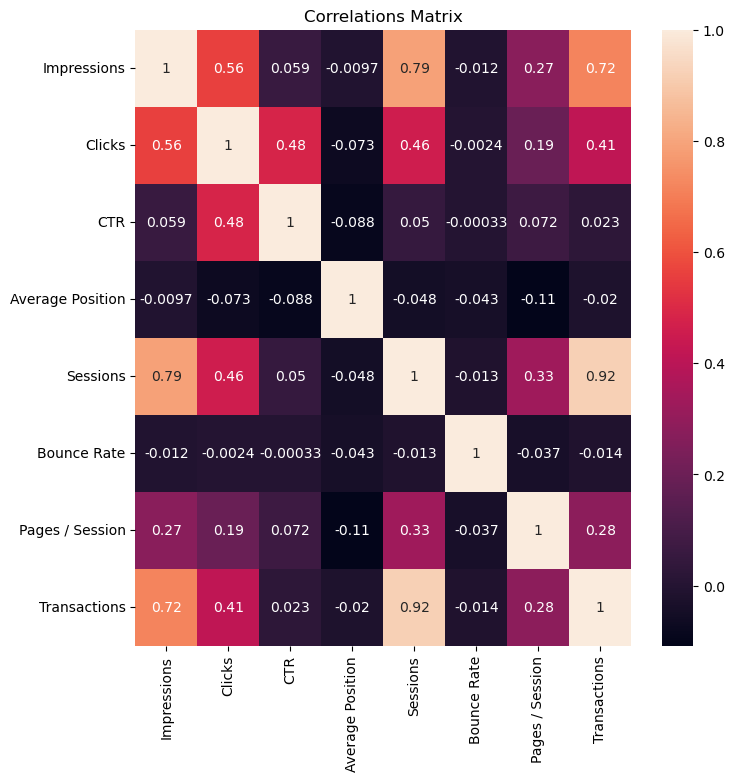

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[8,8])
sns.heatmap(X.corr(), annot=True)
plt.title('Correlations Matrix')
plt.show()

In [16]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 20)

In [17]:
## dimension of train data
print(X_train.shape)
print(y_train.shape)

(1349, 8)
(1349,)


In [18]:
## dimension of test data
print(X_test.shape)
print(y_test.shape)

(338, 8)
(338,)


In [19]:
print(X_train.head())
print(y_train.head())

      Impressions  Clicks  CTR  Average Position  Sessions  Bounce Rate  \
2601            0       0  0.0          1.000000         2     0.000000   
2575            0       0  0.0          1.000000         2     0.000000   
3104            6       0  0.0         29.166667         5     0.000000   
4319            4       0  0.0          1.750000       168     0.011905   
4765           11       0  0.0         15.000000      1198     0.004174   

      Pages / Session  Transactions  
2601         2.000000             0  
2575         2.000000             0  
3104         4.800000             0  
4319         9.297619             0  
4765         9.772120            21  
2601       0.00
2575       0.00
3104       0.00
4319       0.00
4765    4503.85
Name: Revenue, dtype: float64


In [20]:
from sklearn.preprocessing import StandardScaler
## Create StandardScaler instance
scaler = StandardScaler()
# Scale the train data
X_train = scaler.fit_transform(X_train)
# Scale the test data
X_test = scaler.transform(X_test)

In [21]:
## Create KNeighborsRegressor instance
# default n_neighbors = 5
model_knn_reg = KNeighborsRegressor()

In [22]:
model_knn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [23]:
## predict target from test model
y_pred = model_knn_reg.predict(X_test)
# get the predicted for test data
print(y_pred)

[4.7710380e+03 6.3761900e+03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4598000e+01
 0.0000000e+00 1.1115894e+04 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.5191100e+03 0.0000000e+00
 8.5079000e+03 0.0000000e+00 6.6236100e+03 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3314972e+04
 8.7398500e+03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.7147360e+03
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.5998000e+01
 5.2083920e+03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.6852800e+03 0.0000000e+00 0.0000000e+00 4.3389520e+03
 0.000

In [24]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)

In [25]:
print("Train Error (RMSE) = {:,}".format(rmse))

Train Error (RMSE) = 1,266.35


In [26]:
r2_score(y_test, y_pred)

0.9019507485609072

In [27]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 20)

In [28]:
from sklearn.preprocessing import StandardScaler
## Create StandardScaler instance
scaler = StandardScaler()
# Scale the train dat
X_train = scaler.fit_transform(X_train)
# Scale the test data
X_test = scaler.transform(X_test)

In [29]:
X_train

array([[-0.58650901, -0.3474968 , -0.23715921, ..., -0.17876821,
        -1.01889884, -0.42463079],
       [-0.58650901, -0.3474968 , -0.23715921, ..., -0.17876821,
        -1.01889884, -0.42463079],
       [ 0.05465846, -0.3474968 , -0.23715921, ..., -0.17876821,
        -0.48970487, -0.42463079],
       ...,
       [ 0.05465846, -0.3474968 , -0.23715921, ..., -0.17876821,
        -0.64090314, -0.42463079],
       [-0.58650901, -0.3474968 , -0.23715921, ..., -0.17876821,
        -0.82990099, -0.42463079],
       [ 1.65757712, -0.3474968 , -0.23715921, ...,  0.02800835,
         0.19023872,  1.79268205]])

In [30]:
# initialized best Root Mean Square Error
best_rmse = 0
## Initialize best k
best_k = 0
# Select which k neighbors to study
possible_k = [1,2,3,4,5,6,7,8,9]

In [31]:
# Start loop for grid search
for k in possible_k:
    # Create KNN regressor instance
    knn_reg = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    ## fit the KNN Regression model on train data
    knn_reg.fit(X_train, y_train)
    # Train KNN model and predict values for X_test
    y_pred = knn_reg.predict(X_test)
    # Calculate rmse between actual y values and predicted values
    mse = mean_squared_error(y_pred,y_test)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_test, y_pred)    
    # Print k and rmse of each grid point
    print('k: %i, rmse: %.2f, r2: %.2f' %(k, rmse, r2_square))
    # If this value is better than previous one (or it is first step), update best value
    if rmse < best_rmse or k == possible_k[0]:
        best_rmse = rmse
        best_k = k
# Print final best k value and rmse
print("Optimum: kNN, k=%i, rmse: %.2f" %(best_k,best_rmse))

k: 1, rmse: 1206.61, r2: 0.91
k: 2, rmse: 1257.52, r2: 0.90
k: 3, rmse: 1281.30, r2: 0.90
k: 4, rmse: 1172.69, r2: 0.92
k: 5, rmse: 1266.35, r2: 0.90
k: 6, rmse: 1307.43, r2: 0.90
k: 7, rmse: 1349.46, r2: 0.89
k: 8, rmse: 1386.73, r2: 0.88
k: 9, rmse: 1420.15, r2: 0.88
Optimum: kNN, k=4, rmse: 1172.69
